In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
plt.rcParams['text.usetex'] = True

In [2]:
UTILS={
    "COMP_RES": './results/compiled_results/',
    'DATASET': "Reuters30k",
    'TARGET_DIMS':[10,20,30,40],
    'DR_TECHS': ['DiffRed', 'PCA', 'RMap', 'S-PCA', 'K-PCA']
}

In [4]:
def plot(PLOT_DATA:dict, title:str, xlabel:str, ylabel:str, ci:bool=False, alpha=0.1, colormap:str='tab10', log_scale:bool=False):
    if not ci:
        min_tick=1000
        fig, ax = plt.subplots()
        if log_scale:
            ax.set_yscale('log')
        cmap = plt.cm.get_cmap(colormap, len(PLOT_DATA))
        # ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
        for i, (algorithm, data) in enumerate(PLOT_DATA.items()):
            x = data['x']
            y = data['y']
            color = cmap(i)
            label = f'{algorithm}'
            ax.plot(x, y, color=color, label=label,marker='o', markersize=6, linestyle='-')
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

        fig.legend(
            ncol=1, fancybox=True, shadow=True)
        plt.show()
    else:
        min_tick=1000
        fig, ax = plt.subplots()
        if log_scale:
            ax.set_yscale('log')
        cmap = plt.cm.get_cmap(colormap, len(PLOT_DATA))
        for i, (algorithm, data) in enumerate(PLOT_DATA.items()):
            if algorithm!='RMap':
                x = data['x']
                y = data['y']
                if min(y)<min_tick:
                    min_tick=min(y)
                color = cmap(i)
                label = f'{algorithm}'
                ax.plot(x, y, color=color, label=label,marker='o', markersize=6, linestyle='-')
            else:
                x=np.array(data['x'])
                y=np.array(data['y'])
                std=np.array(data['std'])
                ci=1.96*std/np.sqrt(len(x))
                color = cmap(i)
                label = f'{algorithm}'
                ax.plot(x, y, color=color, label=label,marker='o', markersize=6, linestyle='-')
                ax.fill_between(x, (y-ci), (y+ci), color='r', alpha=alpha)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

        fig.legend(
            ncol=1, fancybox=True, shadow=True)
        plt.show()

# $\Lambda_{S}$ Plots

In [66]:
METRIC='Stress'
PLOT_DATA={}

In [67]:
for dr_tech in UTILS['DR_TECHS']:
    if dr_tech!='RMap':
        x,y=[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()

        PLOT_DATA[dr_tech]={'x':x, 'y':y}
    else:
        x,y,std=[],[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()
        std=df['stdev'].tolist()

        PLOT_DATA[dr_tech]={'x':x, 'y':y, 'std':std}

/tmp/ipykernel_3252/2497405319.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap, len(PLOT_DATA))


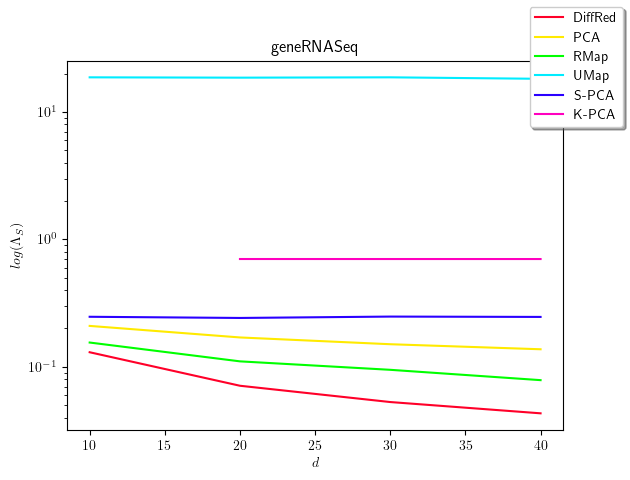

In [68]:
plot(PLOT_DATA, f"{UTILS['DATASET']}", '$d$', r'$log(\Lambda_S)$', True, 0,'gist_rainbow', True)

In [88]:
PLOT_DATA2={}

In [89]:
for dr_tech in UTILS['DR_TECHS']:
    if dr_tech in ['UMap', 'K-PCA', 'S-PCA']:
        continue
    if dr_tech!='RMap':
        x,y=[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()

        PLOT_DATA2[dr_tech]={'x':x, 'y':y}
    else:
        x,y,std=[],[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()
        std=df['stdev'].tolist()

        PLOT_DATA2[dr_tech]={'x':x, 'y':y, 'std':std}

/tmp/ipykernel_23052/2602891223.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(PLOT_DATA))


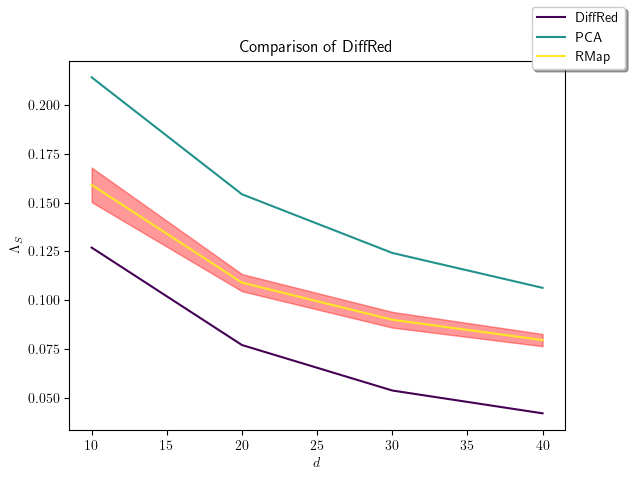

In [90]:
plot(PLOT_DATA2, "Comparison of DiffRed", '$d$', r'$\Lambda_S$', True, 0.4)

# $\Lambda_{M_1}$ Plots

In [18]:
METRIC='M1'
PLOT_DATA={}

In [19]:
for dr_tech in UTILS['DR_TECHS']:
    if dr_tech!='RMap':
        x,y=[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()

        PLOT_DATA[dr_tech]={'x':x, 'y':y}
    else:
        x,y,std=[],[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()
        std=df['stdev'].tolist()

        PLOT_DATA[dr_tech]={'x':x, 'y':y, 'std':std}

/tmp/ipykernel_10787/3566552742.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap, len(PLOT_DATA))


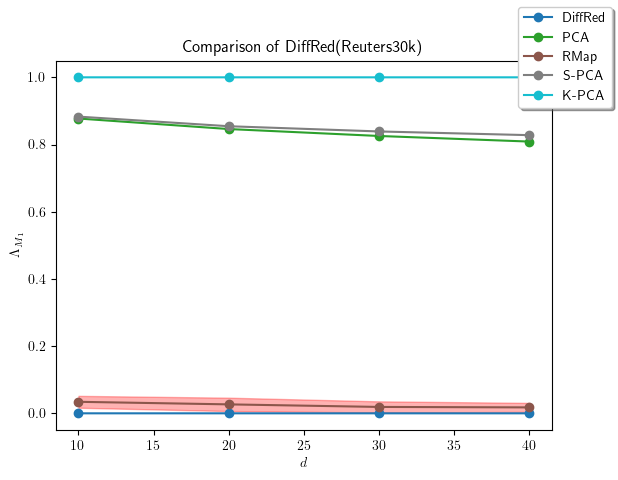

In [21]:
plot(PLOT_DATA, "Comparison of DiffRed(Reuters30k)", '$d$', r'$\Lambda_{M_1}$', True, 0.3, 'tab10')

In [94]:
PLOT_DATA2={}

In [95]:
for dr_tech in UTILS['DR_TECHS']:
    if dr_tech in ['UMap', 'K-PCA', 'S-PCA']:
        continue
    if dr_tech!='RMap':
        x,y=[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()

        PLOT_DATA2[dr_tech]={'x':x, 'y':y}
    else:
        x,y,std=[],[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()
        std=df['stdev'].tolist()

        PLOT_DATA2[dr_tech]={'x':x, 'y':y, 'std':std}

/tmp/ipykernel_23052/2602891223.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(PLOT_DATA))


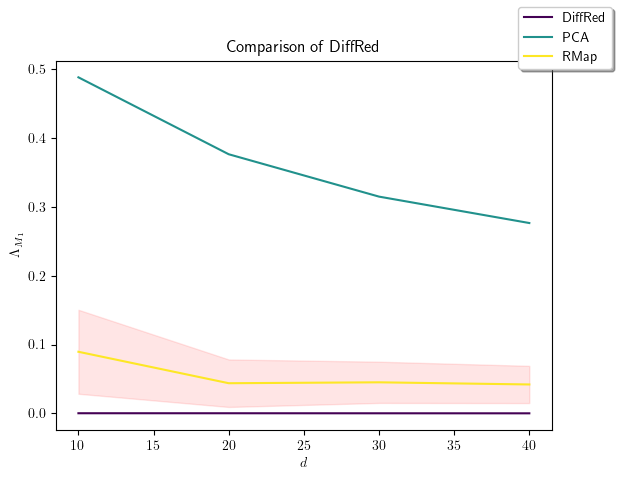

In [97]:
plot(PLOT_DATA2, "Comparison of DiffRed", '$d$', r'$\Lambda_{M_1}$', True, 0.1)

# $\Lambda_{M_1}$ vs $\rho(A)$ plot (RMap)

In [3]:
sr_path='./results/stable_rank.xlsx'
sr=pd.read_excel(sr_path)

In [4]:
stable_ranks=sr[['Dataset', 'Stable Rank']]
stable_ranks=stable_ranks.set_index('Dataset')['Stable Rank'].to_dict()

In [5]:
stable_ranks

{'Cifar10': 6.13130505901164,
 'Reuters30k': 14.50200643319319,
 'geneRNASeq': 1.11733969850836,
 'FMnist': 2.681504378944568,
 'Bank': 1.476372804463409,
 'hatespeech': 11.04257620674036}

In [6]:
stable_ranks['DIV2k']=8.39
stable_ranks['APTOS']=1.32

In [7]:
m1_vals={
    'Cifar10':0.09,
    'Reuters30k':0.03 ,
    'geneRNASeq':0.31 ,
    'FMnist': 0.11,
    'hatespeech': 0.06,
    'APTOS':0.24,
    'DIV2k':0.05,
}

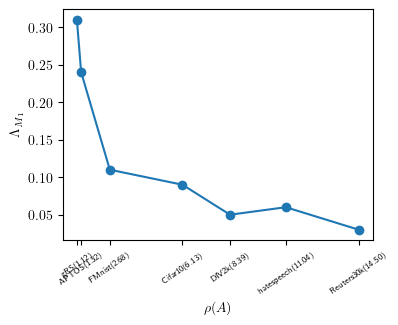

In [14]:
x,y,x_labels=[],[],[]

for key in m1_vals.keys():
    x.append(stable_ranks[key])
    y.append(m1_vals[key])
    if key=='geneRNASeq':
        x_labels.append(f'gRS({stable_ranks[key]:0.2f})')
    else:
        x_labels.append(f'{key}({stable_ranks[key]:0.2f})')
    
x=np.array(x)
idx=np.argsort(x)
x=x[idx]
y=np.array(y)[idx]
x_labels=np.array(x_labels)[idx]
plt.figure(figsize=(4,3))
plt.plot(x,y,marker='o', linestyle='-',markersize=6)
plt.xlabel(r'$\rho(A)$')
plt.ylabel(r'$\Lambda_{M_1}$')
plt.xticks(x,x_labels,rotation=35, fontsize=6)
plt.show()

## $\Lambda_{M_1}$ vs $d$ plot for RMap (Reuters30k)

In [15]:
DATASET='Reuters30k'
res_path=os.path.join(UTILS['COMP_RES'],'M1', 'RMap', f'{DATASET}.xlsx')
result_sheet=pd.read_excel(res_path)
results=result_sheet.set_index('Target Dimension')['M1'].to_dict()

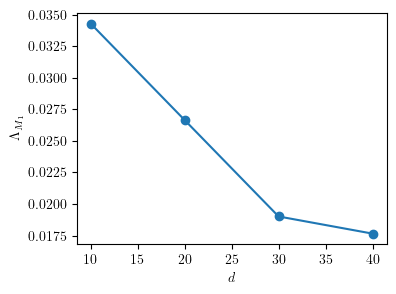

In [21]:
plt.figure(figsize=(4,3))
x=np.array(list(results.keys()))
y=np.array(list(results.values()))
idx=np.argsort(x)
x=x[idx]
y=y[idx]
plt.plot(x,y,marker='o', linestyle='-', markersize=6)
plt.xlabel(r'$d$')
plt.ylabel(r'$\Lambda_{M_1}$')
plt.show()

# _DiffRed_ plot for Exponent product in M1 failure probability

## Multiple Target Dimensions

In [22]:
from compute_stable_rank import stable_rank
from compute_theoretical_opt import calculate_p

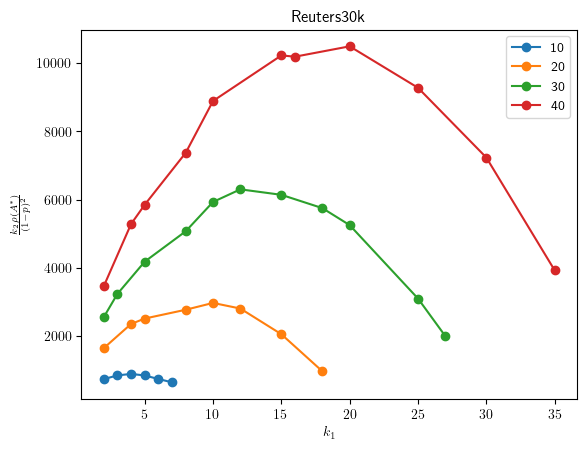

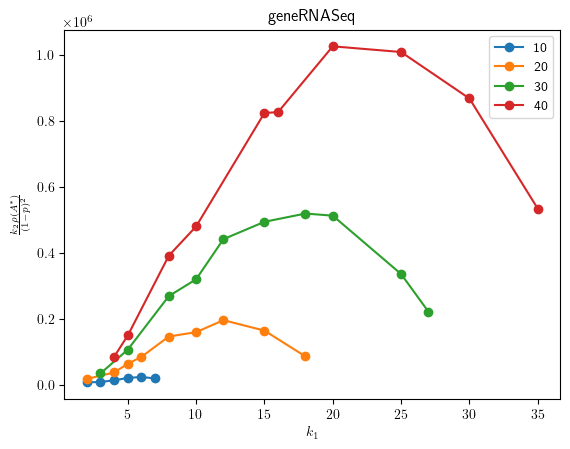

In [26]:
# NOTE: WE have not taken k1=0 because that corresponds to pure RMap. In this section, we're looking only at the product without taking into consideration the Monte-carlo iterations, therefore for this analysis, DiffRed with k1=0 is equivalent to pure RMap.
DATASETS=['Reuters30k', 'geneRNASeq']
SING_DIR='./norm_singular_values/'
target_dimensions=[10,20,30,40]
k1_vals={
    'Reuters30k': [[2,3,4,5,6,7],[2,4,5,8,10,12,15,18],[2,3,5,8,10,12,15,18,20,25,27],[2,4,5,8,10,15,16,20,25,30,35]],
    'geneRNASeq':[[2,3,4,5,6,7],[2,4,5,6,8,10,12,15,18],[3,5,8,10,12,15,18,20,25,27],[4,5,8,10,15,16,20,25,30,35]]
}

sr_path='./results/stable_rank.xlsx'
sr=pd.read_excel(sr_path)
stable_ranks=sr[['Dataset', 'Stable Rank']]
stable_ranks=stable_ranks.set_index('Dataset')['Stable Rank'].to_dict()
stable_ranks={key:stable_ranks[key] for key in DATASETS}

for dataset in DATASETS:
    sigma=np.load(os.path.join(SING_DIR,f'{dataset}.npy'))
    for i in range(len(target_dimensions)):
        k1=np.array(k1_vals[dataset][i])
        target_dim=target_dimensions[i]
        k2=target_dim-k1
        x=k1
        res_sr=np.array([stable_rank(sigma[k:]) for k in k1])
        p=np.array([calculate_p(sigma,k) for k in k1])

        y=k2*res_sr/(1-p)**2
        plt.plot(x,y,label=f'{target_dim}', marker='o', linestyle='-', markersize=6)
    plt.xlabel(r'$k_1$')
    plt.ylabel(r'$\frac{k_2\rho(A^{*})}{(1-p)^2}$')
    plt.title(f'{dataset}')
    plt.legend()
    plt.show()
    plt.close() 

## One Target Dimension

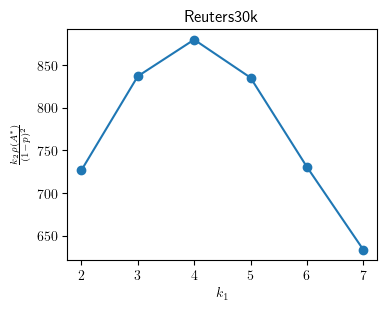

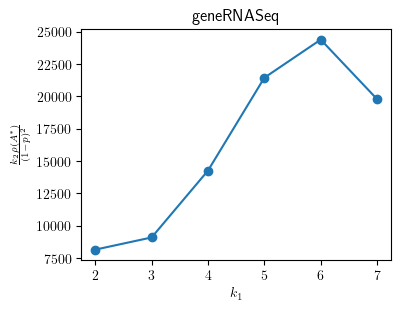

In [29]:
# NOTE: WE have not taken k1=0 because that corresponds to pure RMap. In this section, we're looking only at the product without taking into consideration the Monte-carlo iterations, therefore for this analysis, DiffRed with k1=0 is equivalent to pure RMap.
DATASETS=['Reuters30k', 'geneRNASeq']
SING_DIR='./norm_singular_values/'
target_dimensions=[10]
k1_vals={
    'Reuters30k': [[2,3,4,5,6,7],[2,4,5,8,10,12,15,18],[2,3,5,8,10,12,15,18,20,25,27],[2,4,5,8,10,15,16,20,25,30,35]],
    'geneRNASeq':[[2,3,4,5,6,7],[2,4,5,6,8,10,12,15,18],[3,5,8,10,12,15,18,20,25,27],[4,5,8,10,15,16,20,25,30,35]]
}

sr_path='./results/stable_rank.xlsx'
sr=pd.read_excel(sr_path)
stable_ranks=sr[['Dataset', 'Stable Rank']]
stable_ranks=stable_ranks.set_index('Dataset')['Stable Rank'].to_dict()
stable_ranks={key:stable_ranks[key] for key in DATASETS}

for dataset in DATASETS:
    plt.figure(figsize=(4,3))
    sigma=np.load(os.path.join(SING_DIR,f'{dataset}.npy'))
    for i in range(len(target_dimensions)):
        k1=np.array(k1_vals[dataset][i])
        target_dim=target_dimensions[i]
        k2=target_dim-k1
        x=k1
        res_sr=np.array([stable_rank(sigma[k:]) for k in k1])
        p=np.array([calculate_p(sigma,k) for k in k1])

        y=k2*res_sr/(1-p)**2
        plt.plot(x,y, marker='o', linestyle='-', markersize=6)
    plt.xlabel(r'$k_1$')
    plt.ylabel(r'$\frac{k_2\rho(A^{*})}{(1-p)^2}$')
    plt.title(f'{dataset}')
    plt.show()
    plt.close() 

# $\Lambda_{S}$ plots for RMap

In [6]:
DATASETS=['geneRNASeq', 'Reuters30k']

PLOT_DATA={}
for DATASET in DATASETS:
    res_path=os.path.join(UTILS['COMP_RES'],'Stress','RMap', f'{DATASET}.xlsx')

    results_df=pd.read_excel(res_path)
    results=results_df.set_index('Target Dimension')['Stress'].to_dict()
    x=np.array(list(results.keys()))
    y=np.array(list(results.values()))
    idx=np.argsort(x)
    x,y=x[idx],y[idx]
    PLOT_DATA[DATASET]={'x':x, 'y':y}

/tmp/ipykernel_5411/3566552742.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap, len(PLOT_DATA))


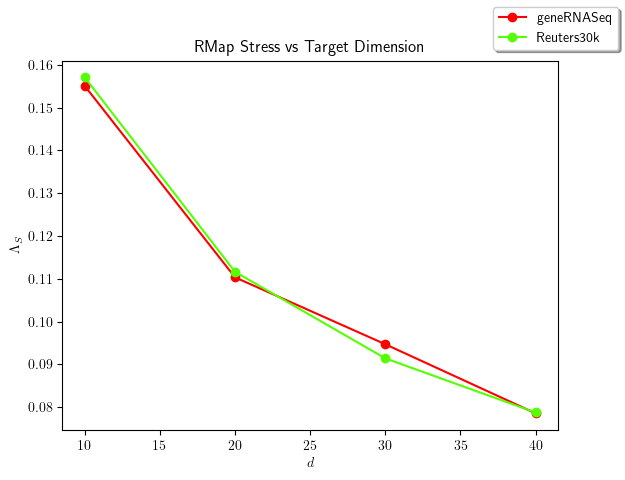

In [14]:
plot(PLOT_DATA, 'RMap Stress vs Target Dimension', r'$d$', r'$\Lambda_S$', False, None,'prism')

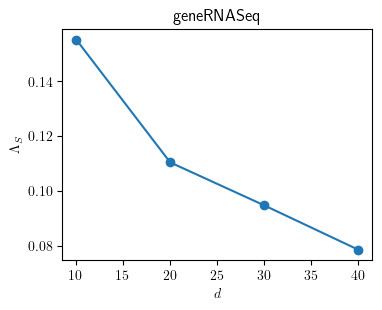

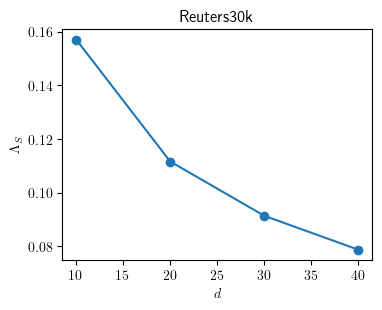

In [17]:
for key in PLOT_DATA.keys():
    x=PLOT_DATA[key]['x']
    y=PLOT_DATA[key]['y']
    plt.figure(figsize=(4,3))
    plt.plot(x,y,marker='o', markersize=6, linestyle='-')
    plt.title(key)
    plt.xlabel(r'$d$')
    plt.ylabel(r'$\Lambda_S$')
    plt.show()
    plt.close()